# 0. Install and Import Dependencies

In [ ]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python matplotlib

In [5]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import cv2

# 1. Load Model

In [39]:
#interpreter = tf.lite.Interpreter(model_path='../../models/lite-model_movenet_singlepose_lightning_3.tflite')
interpreter = tf.lite.Interpreter(model_path='../../models/lite-model_movenet_singlepose_thunder_3.tflite')
interpreter.allocate_tensors()

# 2. Make Detections

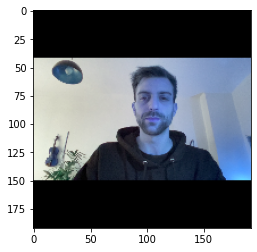

In [40]:
plt.imshow(tf.cast(np.squeeze(img), dtype=tf.int32))

In [41]:
img = frame.copy()

In [42]:
img.shape

(720, 1280, 3)

In [43]:
interpreter.get_output_details()

[{'name': 'StatefulPartitionedCall:0',
  'index': 312,
  'shape': array([ 1,  1, 17,  3], dtype=int32),
  'shape_signature': array([ 1,  1, 17,  3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [58]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Reshape image
    img = frame.copy()
    img = tf.image.resize_with_pad(np.expand_dims(img, axis=0), 256,256)
    input_image = tf.cast(img, dtype=tf.float32)
    
    # Setup input and output 
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    # Make predictions 
    interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
    interpreter.invoke()
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
    print(keypoints_with_scores)
    
    # Rendering 
    draw_connections(frame, keypoints_with_scores, EDGES, 0.4)
    draw_keypoints(frame, keypoints_with_scores, 0.4)
    
    cv2.imshow('MoveNet Lightning', frame)
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

[[[[0.50644714 0.56793296 0.7485904 ]
   [0.47850856 0.6076631  0.65181065]
   [0.45880246 0.53907454 0.8950509 ]
   [0.51977265 0.6359186  0.7233173 ]
   [0.48504958 0.4811515  0.792457  ]
   [0.6872029  0.729849   0.8182808 ]
   [0.65758    0.3193865  0.9024613 ]
   [0.7687349  0.7902072  0.01089677]
   [0.7691797  0.23401198 0.02970606]
   [0.7519127  0.79363483 0.01077014]
   [0.76208836 0.24897012 0.01298735]
   [0.83299387 0.71563077 0.00724569]
   [0.7946705  0.24346575 0.00934285]
   [0.70753586 0.73240435 0.00932565]
   [0.6668271  0.31449825 0.04026377]
   [0.6153666  0.7787803  0.0040994 ]
   [0.78044    0.07854752 0.01304337]]]]
[[[[0.5113293  0.5542467  0.7378879 ]
   [0.47807    0.5917213  0.7209493 ]
   [0.46676916 0.5222595  0.61069626]
   [0.5135577  0.6245913  0.59055716]
   [0.49030015 0.46776086 0.8046919 ]
   [0.68265235 0.7253874  0.80837566]
   [0.6707805  0.31816462 0.89644396]
   [0.7672401  0.7928675  0.01028949]
   [0.76639175 0.24137877 0.01853842]
   [0.744

[[[[0.49688026 0.5270318  0.7232021 ]
   [0.4620814  0.5644472  0.8121828 ]
   [0.45903248 0.4939198  0.84200937]
   [0.50428426 0.60715866 0.5879686 ]
   [0.4922666  0.45054716 0.8293451 ]
   [0.6790651  0.7156772  0.83593583]
   [0.6712535  0.31876975 0.89229184]
   [0.7695152  0.79013056 0.00949258]
   [0.7749053  0.23521483 0.01238254]
   [0.68741465 0.70495695 0.0137504 ]
   [0.67984456 0.29203257 0.00489303]
   [0.8587883  0.67423576 0.00187695]
   [0.7834577  0.27121922 0.00617826]
   [0.69711787 0.71945435 0.01494151]
   [0.6819776  0.31345928 0.03909448]
   [0.6172038  0.68046725 0.00288752]
   [0.5713398  0.4339968  0.00300092]]]]
[[[[0.49314845 0.5275758  0.7322277 ]
   [0.45829812 0.56432194 0.8501278 ]
   [0.45630047 0.49383852 0.84950125]
   [0.4996581  0.6080323  0.59019053]
   [0.49102876 0.45003325 0.84261906]
   [0.6835661  0.7212047  0.77052414]
   [0.6758015  0.3162504  0.9153942 ]
   [0.76577497 0.7865287  0.00777984]
   [0.77634525 0.23863943 0.00981709]
   [0.674

[[[[0.4941269  0.5255274  0.8106    ]
   [0.45892558 0.55943805 0.6552041 ]
   [0.45894703 0.4894035  0.8989202 ]
   [0.4957812  0.6033482  0.8101564 ]
   [0.49461326 0.44531497 0.88323975]
   [0.6780417  0.7100333  0.8402231 ]
   [0.66361934 0.33596122 0.81789076]
   [0.7254627  0.83536077 0.02315429]
   [0.73675495 0.16775711 0.19324222]
   [0.7121909  0.87697476 0.11335215]
   [0.67406356 0.1747309  0.26909828]
   [0.81354    0.8003995  0.00859156]
   [0.8089383  0.24467894 0.0079295 ]
   [0.702664   0.74301535 0.00497827]
   [0.6873956  0.33729243 0.01665732]
   [0.48338175 0.6058813  0.00889879]
   [0.49260512 0.31625155 0.01904005]]]]
[[[[0.49640667 0.5276818  0.77168214]
   [0.46093458 0.56211245 0.73062074]
   [0.45862818 0.49117154 0.90263474]
   [0.4982446  0.6032504  0.76502454]
   [0.4898067  0.44487864 0.8888856 ]
   [0.67146313 0.6958991  0.7657051 ]
   [0.6585336  0.34245673 0.745293  ]
   [0.7357419  0.8511669  0.14297235]
   [0.72014815 0.17688312 0.22888225]
   [0.697

[[[[0.48767963 0.4281075  0.6802225 ]
   [0.45574838 0.4821305  0.6372653 ]
   [0.45177168 0.43319002 0.5648637 ]
   [0.49479356 0.5873979  0.8245533 ]
   [0.47306037 0.4791585  0.60868114]
   [0.6752266  0.72512615 0.69061977]
   [0.663177   0.32612786 0.6944242 ]
   [0.7372098  0.77081835 0.01540476]
   [0.7680038  0.16470447 0.11848155]
   [0.73919183 0.797382   0.08527687]
   [0.74069804 0.15383263 0.46422687]
   [0.90777206 0.7159067  0.00373447]
   [0.82386494 0.21504788 0.00900397]
   [0.68673044 0.74581426 0.02865952]
   [0.642518   0.3617412  0.02576774]
   [0.4548888  0.46374232 0.03032482]
   [0.44380984 0.40544045 0.01910049]]]]
[[[[0.48725554 0.4246497  0.65646756]
   [0.45640478 0.47773868 0.7673534 ]
   [0.45309344 0.43031916 0.6456078 ]
   [0.49613994 0.5861612  0.77989405]
   [0.47306496 0.4737686  0.4746185 ]
   [0.67880666 0.72388464 0.7200234 ]
   [0.6627576  0.32698223 0.72371554]
   [0.72022974 0.7798237  0.01513651]
   [0.7776171  0.14682071 0.17991194]
   [0.740

[[[[0.4939569  0.4726593  0.7921524 ]
   [0.4557154  0.52192897 0.8214072 ]
   [0.4563826  0.45314145 0.67779624]
   [0.4919697  0.59749216 0.7469893 ]
   [0.4786664  0.45066246 0.5973432 ]
   [0.6704585  0.7186067  0.69066685]
   [0.66033185 0.3228496  0.7199249 ]
   [0.76197547 0.75386894 0.01227206]
   [0.74968153 0.24634838 0.04442465]
   [0.50020623 0.6224841  0.05534843]
   [0.7379327  0.15515767 0.1759811 ]
   [0.82751733 0.7425144  0.00653833]
   [0.78468794 0.29001844 0.01037565]
   [0.65334636 0.74516135 0.03192371]
   [0.60692436 0.3826158  0.01304212]
   [0.4290842  0.48646417 0.04674956]
   [0.44408214 0.43250656 0.04097557]]]]
[[[[0.49282405 0.48251635 0.67555785]
   [0.4558901  0.529329   0.70125616]
   [0.45557073 0.46000943 0.77041817]
   [0.49144092 0.5987255  0.7733175 ]
   [0.48082545 0.44860223 0.6254386 ]
   [0.6783467  0.71957475 0.6901127 ]
   [0.6611592  0.3324519  0.63296777]
   [0.76418996 0.7633164  0.01333982]
   [0.74856484 0.2471605  0.03295064]
   [0.499

[[[[0.49101514 0.52487475 0.8348242 ]
   [0.4578759  0.5625729  0.7976948 ]
   [0.45428607 0.49401486 0.8179708 ]
   [0.49674666 0.607248   0.64325964]
   [0.48895055 0.45136932 0.6534557 ]
   [0.6864355  0.7151435  0.82495964]
   [0.66635764 0.32545963 0.87916076]
   [0.7464859  0.7869181  0.01639268]
   [0.760532   0.24000534 0.09277114]
   [0.7343683  0.8186534  0.06924912]
   [0.6961693  0.1690982  0.12483847]
   [0.8810536  0.66815937 0.00192401]
   [0.7925649  0.30944708 0.00898877]
   [0.7052451  0.7226164  0.01411769]
   [0.69197965 0.31969604 0.01991382]
   [0.6265845  0.6706174  0.00223061]
   [0.7042061  0.15910167 0.02190983]]]]
[[[[0.4919541  0.52502453 0.82404804]
   [0.45845044 0.56305236 0.80944943]
   [0.45440465 0.4941096  0.82537   ]
   [0.49667054 0.6067486  0.73418427]
   [0.48611528 0.4520039  0.75845337]
   [0.68241054 0.7136401  0.8383007 ]
   [0.6688125  0.32353172 0.8550093 ]
   [0.7441535  0.7743488  0.01353779]
   [0.7219937  0.26165488 0.02073205]
   [0.505

[[[[0.49221557 0.5257202  0.8142401 ]
   [0.45929477 0.56178576 0.73618317]
   [0.45444286 0.4930424  0.7971158 ]
   [0.4975699  0.60490286 0.7652708 ]
   [0.48669618 0.4495672  0.81721836]
   [0.6808185  0.7171935  0.77866095]
   [0.6651197  0.32906142 0.8731364 ]
   [0.73519003 0.7883341  0.02029166]
   [0.716753   0.26074132 0.02160043]
   [0.61840206 0.7796251  0.03197291]
   [0.67465967 0.18668067 0.08137929]
   [0.8624183  0.68069935 0.00300282]
   [0.78995085 0.31134626 0.00981396]
   [0.6629711  0.7494799  0.00965035]
   [0.6895375  0.3202471  0.01764518]
   [0.61753166 0.7751817  0.00714326]
   [0.5732776  0.43257338 0.00290823]]]]
[[[[0.47969115 0.5245881  0.8156848 ]
   [0.44880936 0.5615227  0.6315073 ]
   [0.44622004 0.49075902 0.85191214]
   [0.49481982 0.6041474  0.77402765]
   [0.4907121  0.44872263 0.8214024 ]
   [0.67258775 0.712474   0.7966173 ]
   [0.660024   0.3324302  0.87815106]
   [0.737149   0.7873874  0.03035685]
   [0.7400078  0.24825555 0.04389834]
   [0.618

[[[[0.48459202 0.41658464 0.6213479 ]
   [0.45500866 0.46420538 0.72591233]
   [0.45356825 0.4196927  0.6808454 ]
   [0.4855771  0.5715246  0.7746059 ]
   [0.47120214 0.4667973  0.63738036]
   [0.65629905 0.67143476 0.6115788 ]
   [0.65845704 0.321606   0.7722786 ]
   [0.7779765  0.66221374 0.02283549]
   [0.7726985  0.21015774 0.12937713]
   [0.6203935  0.24201639 0.03144509]
   [0.66814476 0.16994369 0.06878945]
   [0.803403   0.77107924 0.00392577]
   [0.77299494 0.817682   0.00615901]
   [0.62409306 0.8361151  0.01682988]
   [0.5907383  0.26146868 0.02501333]
   [0.45824617 0.45724878 0.04095298]
   [0.44553432 0.4048541  0.02703479]]]]
[[[[0.4882622  0.41478074 0.7392454 ]
   [0.4594586  0.4616496  0.85217106]
   [0.45773125 0.41800776 0.8481275 ]
   [0.48783663 0.5665869  0.79501045]
   [0.47349003 0.46610403 0.6020471 ]
   [0.6574912  0.6788314  0.4832808 ]
   [0.658885   0.3213964  0.77185977]
   [0.77532196 0.6739554  0.0229741 ]
   [0.7748883  0.2203254  0.0775564 ]
   [0.617

[[[[0.47089893 0.5928101  0.5603999 ]
   [0.440654   0.58441997 0.7684796 ]
   [0.44010666 0.5427945  0.7524488 ]
   [0.46269462 0.53566676 0.5791131 ]
   [0.48188743 0.44554245 0.71958864]
   [0.6616737  0.70330626 0.7453314 ]
   [0.6709042  0.3216465  0.6875116 ]
   [0.68219054 0.75469285 0.02043164]
   [0.70365846 0.25507927 0.05206794]
   [0.6172209  0.760952   0.09665105]
   [0.68508697 0.17814188 0.09553567]
   [0.8270065  0.72163725 0.00830078]
   [0.7767484  0.2868063  0.00921413]
   [0.6450981  0.72750145 0.02680537]
   [0.6273761  0.2787213  0.02215984]
   [0.61243176 0.75667673 0.01426885]
   [0.61870766 0.72302216 0.00440684]]]]
[[[[0.47043777 0.6059042  0.54574794]
   [0.4404873  0.58356696 0.7424405 ]
   [0.4400546  0.55786294 0.8078159 ]
   [0.4711396  0.50682384 0.68547386]
   [0.48304608 0.4530581  0.669866  ]
   [0.6628917  0.6973697  0.8151538 ]
   [0.68064374 0.321777   0.7188945 ]
   [0.74446744 0.76152706 0.02803239]
   [0.70585626 0.2571432  0.02288985]
   [0.613

[[[[0.47882006 0.46290812 0.7825764 ]
   [0.44482923 0.5019515  0.8060771 ]
   [0.45807    0.43899915 0.69392085]
   [0.47996658 0.58076626 0.6693001 ]
   [0.4886576  0.4382805  0.42917648]
   [0.6610225  0.70178777 0.56292045]
   [0.67166185 0.3199796  0.6973224 ]
   [0.7506888  0.7467305  0.01475585]
   [0.7385493  0.24038455 0.03942662]
   [0.616725   0.7522412  0.05751625]
   [0.66297007 0.2408904  0.03148392]
   [0.8120382  0.75510263 0.0067113 ]
   [0.7935845  0.29840705 0.00983551]
   [0.64706963 0.7247089  0.02970099]
   [0.6077597  0.28289658 0.03062677]
   [0.48742145 0.5871326  0.00734365]
   [0.4488077  0.42363954 0.03040478]]]]
[[[[0.48047635 0.44152892 0.7715595 ]
   [0.44900167 0.483603   0.7341065 ]
   [0.45955837 0.42558616 0.8808673 ]
   [0.4847473  0.5763399  0.68124723]
   [0.48266467 0.44317764 0.59966725]
   [0.6609426  0.69455284 0.49231282]
   [0.66607994 0.32684362 0.81527746]
   [0.7486558  0.7214008  0.01047713]
   [0.7281063  0.22094373 0.07310569]
   [0.486

[[[[0.49932504 0.3798262  0.7106625 ]
   [0.46095994 0.4158107  0.8305901 ]
   [0.46124247 0.40188244 0.76501954]
   [0.47313467 0.52814454 0.8076259 ]
   [0.4714074  0.48582903 0.71235466]
   [0.67550373 0.6992829  0.42230052]
   [0.66393733 0.32095274 0.7885443 ]
   [0.63953006 0.87873375 0.02915707]
   [0.7484966  0.22090906 0.08781505]
   [0.67805564 0.2179262  0.02170661]
   [0.6863372  0.17022899 0.09856308]
   [0.8107873  0.7781785  0.01053447]
   [0.7823818  0.79374605 0.00844297]
   [0.6843831  0.7256562  0.01491147]
   [0.63858587 0.26830384 0.01330245]
   [0.44146368 0.402887   0.01410639]
   [0.46032065 0.38730395 0.00962314]]]]
[[[[0.4955441  0.37835544 0.71785724]
   [0.45864934 0.4175524  0.8062296 ]
   [0.4587788  0.4008971  0.7863163 ]
   [0.4756457  0.52941006 0.8222101 ]
   [0.4734564  0.48509088 0.6871059 ]
   [0.6736282  0.69592404 0.47979197]
   [0.666184   0.31992948 0.81012625]
   [0.4592381  0.568798   0.0318599 ]
   [0.7474825  0.21057358 0.07732999]
   [0.664

[[[[0.49147412 0.6220485  0.7183835 ]
   [0.46044964 0.6077253  0.5611706 ]
   [0.4546172  0.57892025 0.63421774]
   [0.4726146  0.53712064 0.64073133]
   [0.47825485 0.4756889  0.78852224]
   [0.67452997 0.7146649  0.79189694]
   [0.67056996 0.33197376 0.57989174]
   [0.7073721  0.78984314 0.022515  ]
   [0.7125555  0.26188198 0.03234285]
   [0.66130763 0.8441724  0.00920618]
   [0.63538086 0.3967028  0.01384112]
   [0.81981707 0.713633   0.00425121]
   [0.76668954 0.28073072 0.00755852]
   [0.68715143 0.7294997  0.01091391]
   [0.6816617  0.3279001  0.02282417]
   [0.6343909  0.79275143 0.00218868]
   [0.6255698  0.37229553 0.00989878]]]]
[[[[0.49523    0.6290983  0.65760905]
   [0.46240216 0.611029   0.67252743]
   [0.45540696 0.585015   0.76929224]
   [0.47549105 0.53709483 0.6572823 ]
   [0.47848043 0.48025036 0.80862486]
   [0.6755801  0.71539795 0.803123  ]
   [0.6665622  0.33096942 0.61765504]
   [0.7305799  0.7740174  0.02903584]
   [0.7159359  0.24941249 0.07913354]
   [0.669

[[[[0.5066138  0.60182637 0.6341255 ]
   [0.49858788 0.635728   0.75677377]
   [0.46187705 0.5799909  0.7485848 ]
   [0.5418172  0.6372771  0.5805026 ]
   [0.4713068  0.5104882  0.76188934]
   [0.7011086  0.722548   0.8428488 ]
   [0.66359925 0.29952604 0.8856002 ]
   [0.7626573  0.7865195  0.00751665]
   [0.77505183 0.18659243 0.03351098]
   [0.75136983 0.7720416  0.01020351]
   [0.45977664 0.52588534 0.0573152 ]
   [0.7961378  0.98617387 0.0097633 ]
   [0.7986789  0.21910869 0.00336018]
   [0.7179248  0.7263167  0.01065511]
   [0.6746     0.304137   0.01356927]
   [0.5100999  0.6253599  0.01761523]
   [0.4653907  0.5157659  0.00452447]]]]
[[[[0.52464914 0.62200433 0.6592815 ]
   [0.51476055 0.6520335  0.65127134]
   [0.4769906  0.60392857 0.8163309 ]
   [0.5405235  0.63969034 0.62816894]
   [0.46932283 0.52833396 0.6059863 ]
   [0.7037013  0.72403675 0.76289415]
   [0.65752107 0.30689102 0.8469225 ]
   [0.7542962  0.7636347  0.01103917]
   [0.7760164  0.19408694 0.08726639]
   [0.760

[[[[0.5645481  0.65461504 0.6460173 ]
   [0.54398274 0.67768145 0.69669527]
   [0.5124186  0.6359528  0.64249617]
   [0.5449739  0.6564701  0.48394886]
   [0.4842375  0.54734695 0.55559105]
   [0.7097887  0.72567266 0.76356006]
   [0.66113824 0.31024325 0.9000301 ]
   [0.751212   0.78138363 0.00923625]
   [0.7754263  0.19275585 0.02535152]
   [0.763103   0.79743916 0.01371154]
   [0.47423226 0.55805725 0.05282545]
   [0.8186106  0.69121975 0.0036909 ]
   [0.7871603  0.21761206 0.00518543]
   [0.72805625 0.7303207  0.02055427]
   [0.6708357  0.30770475 0.01300895]
   [0.6708274  0.8001472  0.00416753]
   [0.77792996 0.07917784 0.01192421]]]]
[[[[0.5611018  0.6561528  0.57457733]
   [0.54205203 0.6790213  0.76987195]
   [0.5091196  0.6380483  0.70105577]
   [0.5453655  0.65640837 0.44545022]
   [0.48450598 0.5462334  0.50643474]
   [0.71024287 0.7259029  0.7781229 ]
   [0.65765786 0.3082247  0.8605709 ]
   [0.7516093  0.7753296  0.00793639]
   [0.4671971  0.55361277 0.03202376]
   [0.764

[[[[0.562621   0.65327734 0.62027186]
   [0.5438721  0.6794679  0.7023899 ]
   [0.5085859  0.63901824 0.63152874]
   [0.5484151  0.66343594 0.6761706 ]
   [0.47740164 0.5569508  0.79196835]
   [0.7067491  0.72048223 0.8377388 ]
   [0.64113414 0.32512885 0.7750399 ]
   [0.7260281  0.7340406  0.00774476]
   [0.73822206 0.04780244 0.12043652]
   [0.76144695 0.7824505  0.01208255]
   [0.69302934 0.47808406 0.07269835]
   [0.75921094 0.01302247 0.00998163]
   [0.7368327  0.2705399  0.01616567]
   [0.7284103  0.7250872  0.01722696]
   [0.6566454  0.2980947  0.03092811]
   [0.54940546 0.6618779  0.01221409]
   [0.62495136 0.50073063 0.00246343]]]]
[[[[0.5596421  0.6497976  0.678511  ]
   [0.5402248  0.6764588  0.77418905]
   [0.506693   0.63344043 0.7976595 ]
   [0.5491162  0.6639954  0.7104243 ]
   [0.4778668  0.5534401  0.80670464]
   [0.70840937 0.722336   0.81524086]
   [0.6420278  0.32238075 0.7895836 ]
   [0.7265298  0.7339544  0.00816771]
   [0.7419823  0.04318387 0.11662224]
   [0.761

[[[[5.5724961e-01 6.3219255e-01 7.0058841e-01]
   [5.3739661e-01 6.6428864e-01 8.0528867e-01]
   [5.0024629e-01 6.1485612e-01 6.9272280e-01]
   [5.5038863e-01 6.5563262e-01 5.8787781e-01]
   [4.7737101e-01 5.4065341e-01 8.4287280e-01]
   [7.1884614e-01 7.2150928e-01 7.9192913e-01]
   [6.4373291e-01 3.0896509e-01 8.6671245e-01]
   [7.4953896e-01 7.4571019e-01 9.7810626e-03]
   [7.7728778e-01 1.9184817e-01 3.5176009e-02]
   [7.6383513e-01 7.7941668e-01 1.5354693e-02]
   [4.7111824e-01 5.5306631e-01 6.6074133e-02]
   [8.1727368e-01 6.9125074e-01 4.2288601e-03]
   [7.8775197e-01 2.2928575e-01 7.7970922e-03]
   [7.4170458e-01 7.2505426e-01 1.4589965e-02]
   [6.5198177e-01 3.0432475e-01 2.3430109e-02]
   [6.5351439e-01 7.9777712e-01 3.6336780e-03]
   [5.9637338e-01 4.9504024e-01 7.3143840e-04]]]]
[[[[5.5242878e-01 6.3223743e-01 7.2117138e-01]
   [5.3421545e-01 6.6433460e-01 7.8390723e-01]
   [4.9635580e-01 6.1502111e-01 6.5285277e-01]
   [5.4872805e-01 6.5584749e-01 5.5620182e-01]
   [4.7578

[[[[0.5605443  0.6172097  0.69667506]
   [0.5429802  0.6513785  0.695473  ]
   [0.50163436 0.60467535 0.6887415 ]
   [0.5539271  0.6479683  0.7096084 ]
   [0.47288603 0.5365032  0.7105653 ]
   [0.70457315 0.70860577 0.7114975 ]
   [0.64545566 0.30296186 0.8629526 ]
   [0.7617448  0.77560973 0.01035064]
   [0.7764449  0.19329219 0.03473657]
   [0.7611494  0.782644   0.02301437]
   [0.47213468 0.5452117  0.05410999]
   [0.77076465 0.11107065 0.00594947]
   [0.78756297 0.20783275 0.00623155]
   [0.7249828  0.7119667  0.01640436]
   [0.6526321  0.29913336 0.02069345]
   [0.6681906  0.74742836 0.00433698]
   [0.6116781  0.3848547  0.00225002]]]]
[[[[0.5580548  0.62048763 0.677665  ]
   [0.5418741  0.65513957 0.6105016 ]
   [0.49972463 0.606915   0.6263824 ]
   [0.5541591  0.64977515 0.70064193]
   [0.47502303 0.53617674 0.7617118 ]
   [0.7098411  0.71250653 0.84915423]
   [0.64336574 0.3110081  0.87046885]
   [0.7501531  0.7577503  0.0082702 ]
   [0.4670662  0.5445274  0.02992687]
   [0.760

[[[[0.55403423 0.60910165 0.6382577 ]
   [0.53608143 0.64559823 0.80970985]
   [0.4960672  0.59284073 0.61493444]
   [0.5550611  0.6446081  0.6879635 ]
   [0.47753114 0.522481   0.82441324]
   [0.71013117 0.7079666  0.8068204 ]
   [0.6543997  0.30269462 0.88463455]
   [0.726725   0.71877545 0.00800917]
   [0.7780548  0.19799815 0.02549407]
   [0.7582599  0.76803106 0.01367655]
   [0.47222048 0.5355825  0.04277185]
   [0.77096856 0.11021449 0.00498882]
   [0.7889429  0.22275926 0.00727081]
   [0.72664326 0.71121335 0.02815151]
   [0.6584144  0.29772177 0.03012943]
   [0.64283556 0.783815   0.00389355]
   [0.5913586  0.4544084  0.00116605]]]]
[[[[0.5539744  0.60758954 0.6949939 ]
   [0.5358298  0.644999   0.78933424]
   [0.4949502  0.5919377  0.63916254]
   [0.55574495 0.6447063  0.69715583]
   [0.4772118  0.5228511  0.82892907]
   [0.7115573  0.71136874 0.7502804 ]
   [0.6558035  0.29966092 0.87242603]
   [0.76239204 0.77137727 0.00737059]
   [0.77655864 0.19837967 0.01538169]
   [0.759

[[[[0.5498362  0.6036326  0.5816808 ]
   [0.5321384  0.64087254 0.548005  ]
   [0.49297985 0.58459634 0.77186996]
   [0.5531802  0.64281905 0.63140094]
   [0.47870582 0.5142108  0.6673565 ]
   [0.71483177 0.7125568  0.8669425 ]
   [0.6520619  0.30012414 0.8956325 ]
   [0.7272868  0.7377215  0.00703076]
   [0.776931   0.19787939 0.01562119]
   [0.72212285 0.69311446 0.02105325]
   [0.47567457 0.52460027 0.04716554]
   [0.81692886 0.6767112  0.00420168]
   [0.7903884  0.22063604 0.00610334]
   [0.729659   0.7176338  0.02255097]
   [0.6589574  0.30030888 0.02463195]
   [0.539905   0.6287514  0.02323571]
   [0.48155898 0.5161164  0.00251156]]]]
[[[[0.550151   0.6031801  0.58455896]
   [0.532439   0.6395914  0.54888874]
   [0.49298128 0.58424985 0.7943563 ]
   [0.5510651  0.6412731  0.6127953 ]
   [0.4767069  0.5152685  0.7057561 ]
   [0.7143945  0.712184   0.86936784]
   [0.65260965 0.3036972  0.8775523 ]
   [0.7494974  0.7557805  0.00626662]
   [0.7771623  0.19409235 0.02923444]
   [0.760

[[[[0.5558866  0.6095235  0.6292842 ]
   [0.5411257  0.64662933 0.7937195 ]
   [0.499343   0.5969048  0.6716385 ]
   [0.5608169  0.6483402  0.64277065]
   [0.47623998 0.53189063 0.75934595]
   [0.7066641  0.70048773 0.85738206]
   [0.6472503  0.30237088 0.8847018 ]
   [0.75889266 0.7566665  0.00709593]
   [0.7785721  0.19314787 0.02865335]
   [0.7013888  0.6747069  0.02428332]
   [0.7828552  0.02669811 0.04815942]
   [0.76759017 0.11462772 0.00381395]
   [0.7890922  0.22043855 0.00705403]
   [0.72397804 0.7036358  0.01639491]
   [0.65369666 0.30035624 0.01695284]
   [0.55233794 0.6342406  0.01707077]
   [0.59443146 0.4352038  0.00103286]]]]
[[[[ 5.5334806e-01  5.9509605e-01  6.2024301e-01]
   [ 5.4194808e-01  6.3573289e-01  7.6388437e-01]
   [ 4.9694559e-01  5.8430243e-01  6.6457140e-01]
   [ 5.6569260e-01  6.4645910e-01  6.6912621e-01]
   [ 4.7458762e-01  5.2839518e-01  6.6772264e-01]
   [ 7.0628452e-01  7.0034331e-01  8.5190833e-01]
   [ 6.4551395e-01  3.0064532e-01  8.8427383e-01]
 

[[[[0.5578252  0.5946161  0.6434521 ]
   [0.5452056  0.63461757 0.6495102 ]
   [0.50040185 0.5817143  0.6587624 ]
   [0.56517106 0.64030755 0.58368576]
   [0.4738057  0.52204597 0.78875613]
   [0.7064628  0.700737   0.8525194 ]
   [0.6522112  0.29540625 0.8939747 ]
   [0.7630974  0.7556531  0.00643367]
   [0.7779734  0.19167148 0.01488897]
   [0.7439876  0.80400044 0.01760599]
   [0.78392655 0.02680482 0.04144055]
   [0.84046143 0.97092754 0.00686127]
   [0.78090775 0.21446414 0.00469112]
   [0.72771096 0.7068764  0.00895247]
   [0.657222   0.29696706 0.02092233]
   [0.55446875 0.6319599  0.02343771]
   [0.7748028  0.9842142  0.01619217]]]]
[[[[ 0.55730486  0.5968727   0.59492874]
   [ 0.5442458   0.6348073   0.69471204]
   [ 0.49963856  0.583243    0.67231584]
   [ 0.56281185  0.6405338   0.56066436]
   [ 0.472946    0.52222854  0.7733095 ]
   [ 0.70395607  0.69834423  0.8562046 ]
   [ 0.65041786  0.29348853  0.9047659 ]
   [ 0.7624136   0.7546104   0.0062052 ]
   [ 0.77847534  0.1913

In [59]:
# Demo function idea 

left_eye = keypoints_with_scores[0][0][1]
right_eye = keypoints_with_scores[0][0][2]

left_eye_y = np.array(left_eye[:2]*[480,640]).astype(int)[0]
right_eye_y = np.array(right_eye[:2]*[480,640]).astype(int)[0]

print(left_eye_y)
print(right_eye_y)
# threshold = 'smth'

# if left_eye_y-right_eye_y > threshold:
#     sound alarm 
    

261
240


In [ ]:
# load_model 

In [45]:
shaped = np.squeeze(np.multiply(interpreter.get_tensor(interpreter.get_output_details()[0]['index']), [480,640,1]))

In [46]:
for kp in shaped:
    ky, kx, kp_conf = kp
    print(int(ky), int(kx), kp_conf)

0 0 0.0
0 0 0.0
0 0 0.0
0 0 0.0
0 0 0.0
0 0 0.0
0 0 0.0
0 0 0.0
0 0 0.0
0 0 0.0
0 0 0.0
0 0 0.0
0 0 0.0
0 0 0.0
0 0 0.0
0 0 0.0
0 0 0.0


# 3. Draw Keypoints

In [47]:
def draw_keypoints(frame, keypoints, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for kp in shaped:
        ky, kx, kp_conf = kp
        if kp_conf > confidence_threshold:
            cv2.circle(frame, (int(kx), int(ky)), 4, (0,255,0), -1) 

# 4. Draw Edges

In [48]:
EDGES = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

In [49]:
shaped[0], shaped[1]


(array([0., 0., 0.]), array([0., 0., 0.]))

In [50]:
for edge, color in EDGES.items():
    p1, p2 = edge
    y1, x1, c1 = shaped[p1]
    y2, x2, c2 = shaped[p2]
    print((int(x2), int(y2)))

(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)


In [51]:
def draw_connections(frame, keypoints, edges, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for edge, color in edges.items():
        p1, p2 = edge
        y1, x1, c1 = shaped[p1]
        y2, x2, c2 = shaped[p2]
        
        if (c1 > confidence_threshold) & (c2 > confidence_threshold):      
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,255), 2)